<a href="https://colab.research.google.com/github/Meghana1303/Artificial-Neural-Networks/blob/master/CNN_Classification_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_path='/content/drive/My Drive/Colab Notebooks/Azure Backup/DeepLearning/cats-and-dogs/train'
test_path='/content/drive/My Drive/Colab Notebooks/Azure Backup/DeepLearning/cats-and-dogs/test'
valid_path='/content/drive/My Drive/Colab Notebooks/Azure Backup/DeepLearning/cats-and-dogs/valid'

In [0]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['dog','cat'],batch_size=10)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['dog','cat'],batch_size=10)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['dog','cat'],batch_size=4)

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels=next(train_batches)  # grab the next batch of images from the trainng set  ...every time calls it will fetch a bacth of 10

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


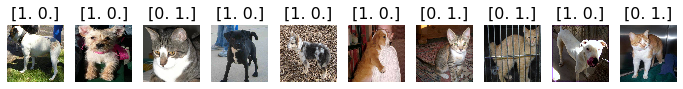

In [0]:
plots(imgs,titles=labels) # one hot encoding 10 for dog and 01 for cat

# Build and train CNN

In [0]:
model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),Flatten(),Dense(2,activation='softmax'),])

# 32 number of layers
# 3 X 3 kernal size
# relu activation fn
# input size height X width X channel
# flattening into 1D tensor
# 2 either cat/dog

In [0]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])
# adam optimizer with learning rate 0.0001
# 

In [0]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batches,validation_steps=4,epochs=5,verbose=2)
# fit_generator - fit model on data generated batch by batch
# steps  total number of batches  40 images hence 4   - size/batch_size
# previous step calc
# verbose how much outpout u want to c in the console


#By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
#verbose=0 will show you nothing (silent)
#verbose=1 will show you an animated progress bar like this:
#progres_bar =================
#verbose=2 will just mention the number of epoch like this:  POOR RESULTS !!!!!!!!!!!!!!

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





 - 12s - loss: 7.4668 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


# predict

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


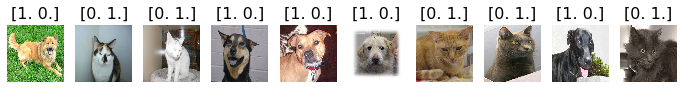

In [0]:
test_imgs, test_labels=next(test_batches)  # only 10 alltogether it will fetch all 
plots(test_imgs,titles=test_labels)

In [0]:
#test_labels = test_labels[:,0]  # change labels as 1 to dog and 0 to cat
test_labels

array([1., 0., 0., 1., 1., 1., 0., 0., 1., 0.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
# total number of steps 10/10


In [0]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
cn=confusion_matrix(test_labels,predictions[:,0])  # CM from scikit learin

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [0]:
#cn_plot_labels=['cat','dog']
#plot_confusion_matrix(cn,cn_plot_labels,title='Confusion matrix')  # 50% accuracy  simple model - 1 conv layer 1 dense layer
cn
# need some complex models....

array([[0, 5],
       [0, 5]])

# fine tuning VGG16 imagenet

In [0]:
vgg16_model=keras.applications.vgg16.VGG16()  # pretrained models in keras  trained for 1000 categories c the summary (None, 1000) 


553467904/553467096 [==============================] - 12s 0us/step


In [0]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
type(vgg16_model)

keras.engine.training.Model

In [0]:
# modofy to identify only cat and dog
# iterate over vgg layer add to model which is sequential
model=Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
model.layers.pop()  # take out the last layer clasifies 1000 objects

In [0]:
model.summary()  # output layer is gone!!!!!

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
for layer in model.layers:
    layer.trainable=False
    
# freeze a layer   never be updated again
#  while training

In [0]:
model.add(Dense(2,activation='softmax'))   # add a dense layer for classification of cats and dogs    (None, 2)  

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# train the fine tuned VGG model

In [0]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batches,validation_steps=4,epochs=5,verbose=2)

Epoch 1/5
 - 29s - loss: 0.6898 - acc: 0.6750 - val_loss: 0.6884 - val_acc: 0.6250
Epoch 2/5
 - 28s - loss: 0.6895 - acc: 0.6750 - val_loss: 0.6882 - val_acc: 0.6250
Epoch 3/5
 - 29s - loss: 0.6892 - acc: 0.6750 - val_loss: 0.6880 - val_acc: 0.6250
Epoch 4/5
 - 28s - loss: 0.6890 - acc: 0.7000 - val_loss: 0.6878 - val_acc: 0.6250
Epoch 5/5
 - 29s - loss: 0.6887 - acc: 0.7000 - val_loss: 0.6876 - val_acc: 0.6250


# predict using vgg16 model

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


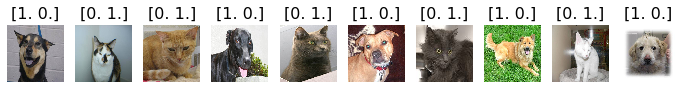

In [0]:
test_imgs, test_labels=next(test_batches)  # only 10 alltogether it will fetch all 
plots(test_imgs,titles=test_labels)

In [0]:
test_labels = test_labels[:,0]  # change labels as 1 to dog and 0 to cat
test_labels

array([1., 0., 0., 1., 0., 1., 0., 1., 0., 1.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [0]:
predictions

array([[0.5066839 , 0.49331608],
       [0.49476036, 0.5052396 ],
       [0.492059  , 0.50794107],
       [0.5230519 , 0.47694814],
       [0.49113765, 0.50886226],
       [0.51209074, 0.48790917],
       [0.52023065, 0.47976935],
       [0.50118655, 0.49881345],
       [0.5049285 , 0.49507147],
       [0.491768  , 0.508232  ]], dtype=float32)

In [0]:
cn=confusion_matrix(test_labels,np.round(predictions[:,0]))  # CM from scikit learin

Confusion matrix, without normalization
[[3 2]
 [1 4]]


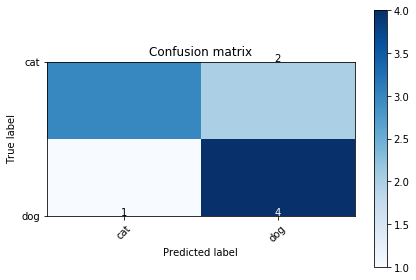

In [0]:
cn_plot_labels=['cat','dog']
plot_confusion_matrix(cn,cn_plot_labels,title='Confusion matrix')

In [0]:
# still not accurate
# adding more training data and add epochs will improve the results

Models for image classification with weights trained on ImageNet
Xception

VGG16

VGG19

ResNet50

InceptionV3

InceptionResNetV2

MobileNet

DenseNet

NASNet 